In [1]:
from google.colab import files


uploaded = files.upload()

Saving penguins_size.csv to penguins_size.csv


In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv']))
print(df)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         37

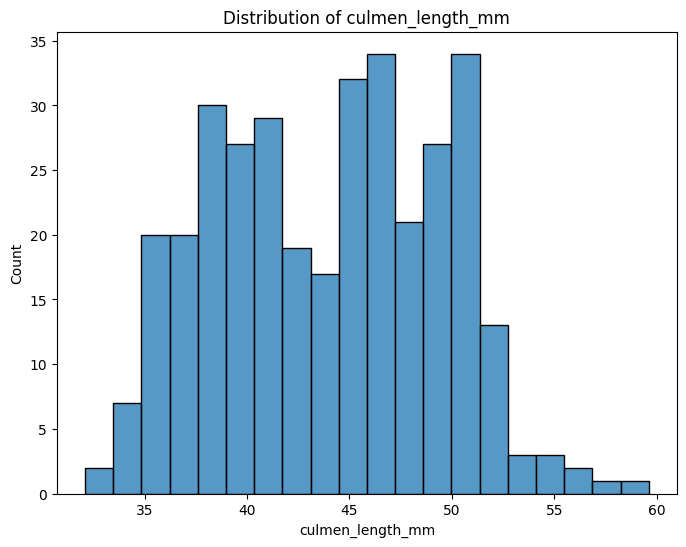

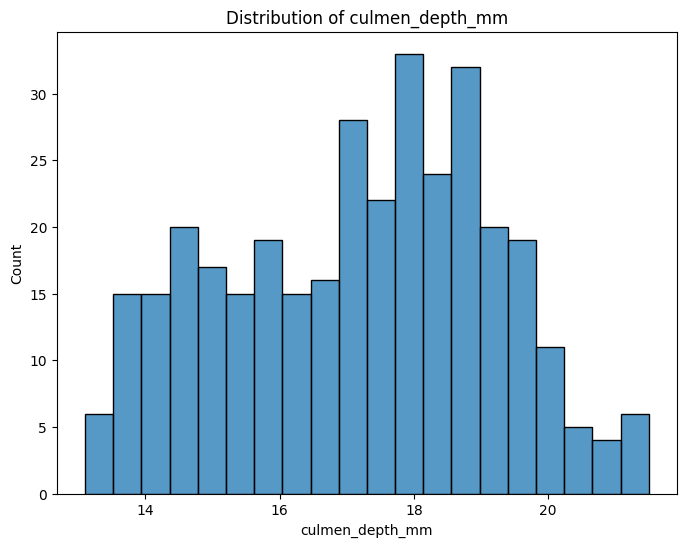

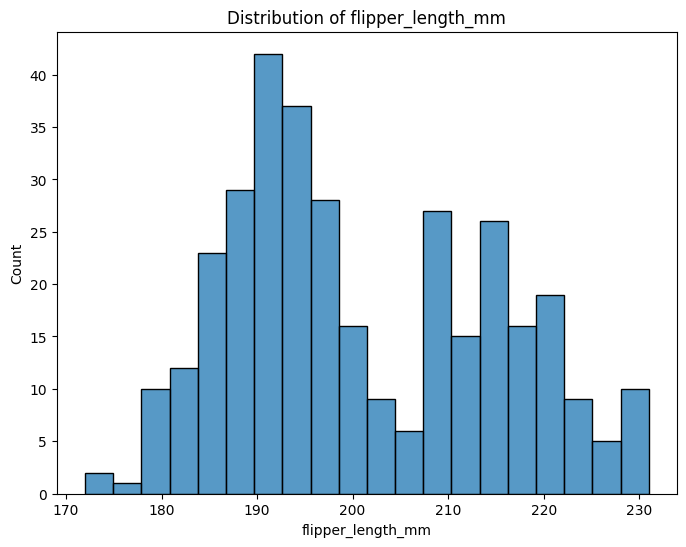

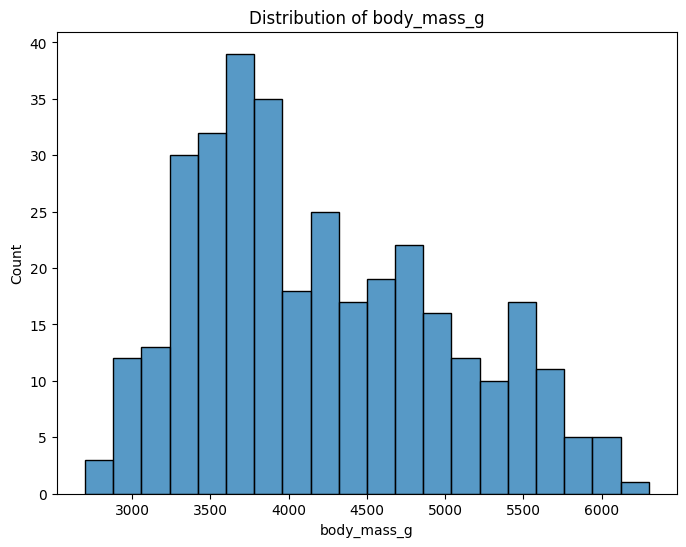

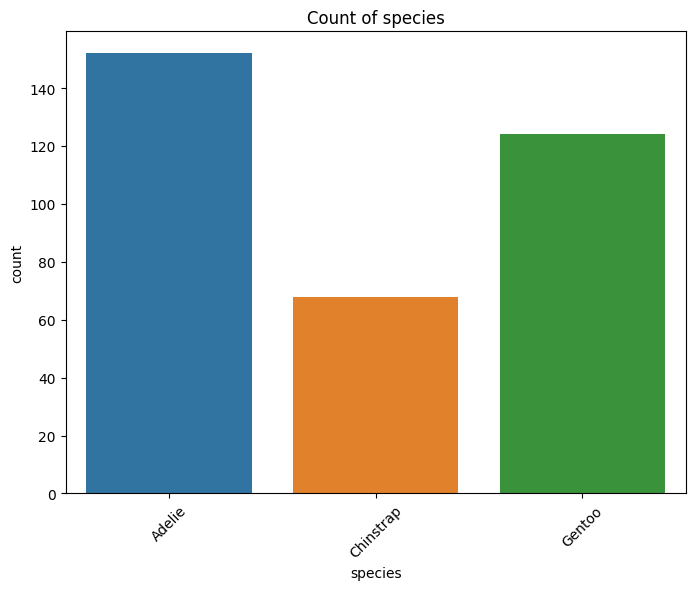

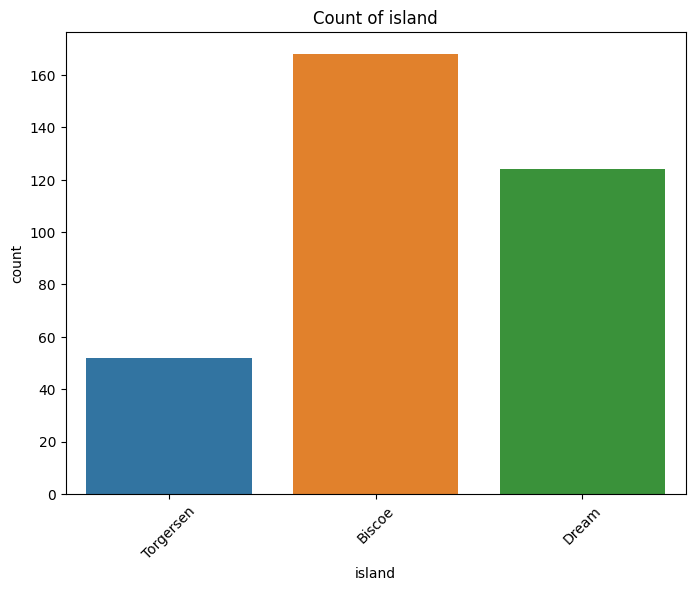

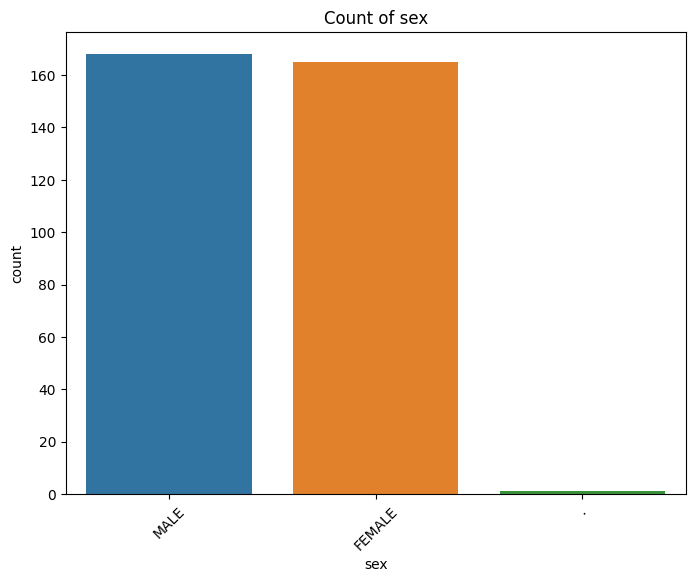

In [3]:
#Univariate analysis
# Numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


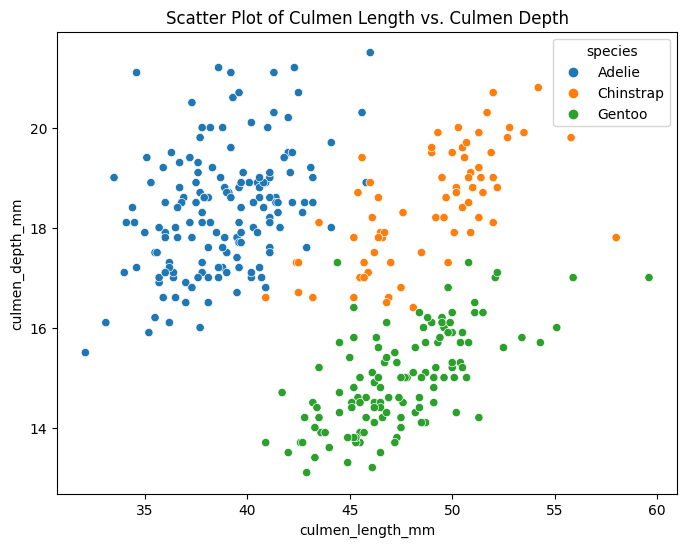

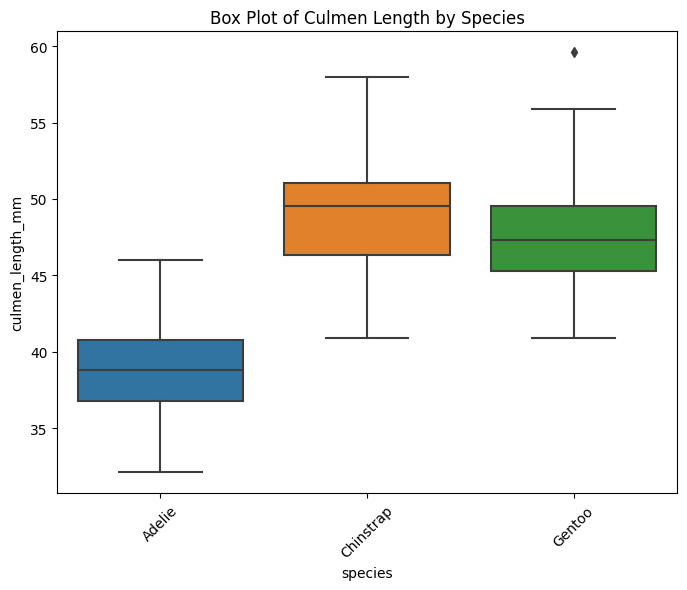

In [4]:
#Bivariate analysis
# Scatter plot for two numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.title('Scatter Plot of Culmen Length vs. Culmen Depth')
plt.show()

# Box plot for a categorical and a numerical variable
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='species', y='culmen_length_mm')
plt.title('Box Plot of Culmen Length by Species')
plt.xticks(rotation=45)
plt.show()

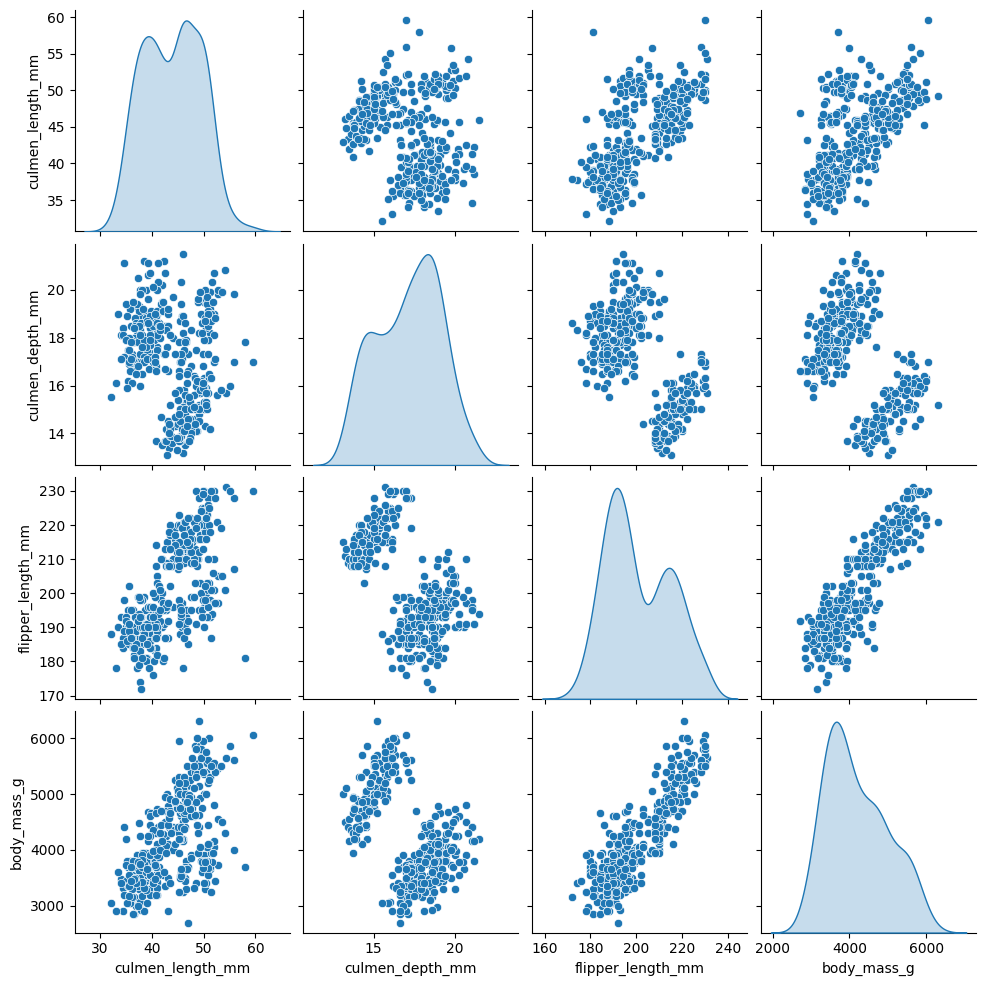

In [5]:
#Multivariate analysis
# Pair plot for selected numerical variables
selected_numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
sns.pairplot(df[selected_numerical_cols], diag_kind='kde')
plt.show()

In [6]:
#Descriptive Statistics
print(df.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [7]:
#Missing Values and Handling them
print(df.isnull().sum())  # Check for missing values

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [9]:
df = df.dropna()  # Drop rows with missing values
print(df.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [10]:
#Outliers
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Example: Remove outliers from 'culmen_length_mm' column
df = remove_outliers_iqr(df, 'culmen_length_mm')
#no outliers

In [20]:
#Check for Categorical columns and perform encoding.
# Label encoding for a categorical column (e.g., 'sex')
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['species'] = label_encoder.fit_transform(df['species'])
df['island'] = label_encoder.fit_transform(df['island'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_encoded,species_encoded,island_encoded
0,0,2,39.1,18.7,181.0,3750.0,2,2,0,2
1,0,2,39.5,17.4,186.0,3800.0,1,1,0,2
2,0,2,40.3,18.0,195.0,3250.0,1,1,0,2
4,0,2,36.7,19.3,193.0,3450.0,1,1,0,2
5,0,2,39.3,20.6,190.0,3650.0,2,2,0,2


In [21]:
#.Check the correlation of independent variables with the target
# Assuming 'species' is the target variable
df.corr().species.sort_values(ascending=False)

species              1.000000e+00
species_encoded      1.000000e+00
flipper_length_mm    8.513508e-01
body_mass_g          7.510201e-01
culmen_length_mm     7.292618e-01
sex                 -1.625802e-17
sex_encoded         -1.625802e-17
island              -6.235949e-01
island_encoded      -6.235949e-01
culmen_depth_mm     -7.408034e-01
Name: species, dtype: float64

In [22]:
#Split the data into dependent and independent variables.
X = df.drop("species", axis=1)  # Features
y = df["species"]  # Target variable
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_encoded,species_encoded,island_encoded
0,2,39.1,18.7,181.0,3750.0,2,2,0,2
1,2,39.5,17.4,186.0,3800.0,1,1,0,2
2,2,40.3,18.0,195.0,3250.0,1,1,0,2
4,2,36.7,19.3,193.0,3450.0,1,1,0,2
5,2,39.3,20.6,190.0,3650.0,2,2,0,2


In [24]:
y.head()

0    0
1    0
2    0
4    0
5    0
Name: species, dtype: int64

In [29]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_encoded,species_encoded,island_encoded
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0,1.0,0.0,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5,0.5,0.0,1.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5,0.5,0.0,1.0
3,1.0,0.167273,0.738095,0.355932,0.208333,0.5,0.5,0.0,1.0
4,1.0,0.261818,0.892857,0.305085,0.263889,1.0,1.0,0.0,1.0


In [30]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [31]:
#check the training and testing data shape.
X_train.shape

(267, 9)

In [32]:
  X_test.shape

(67, 9)

In [34]:
y_train.shape

(267,)

In [35]:
y_test.shape

(67,)